# Глубокое обучение с применением фреймворка LightAutoML и нейронных сетей keras в соревновании  Kaggle [Tabular Playground Series - Jun 2021](https://https://www.kaggle.com/c/tabular-playground-series-jun-2021/overview).


---



---








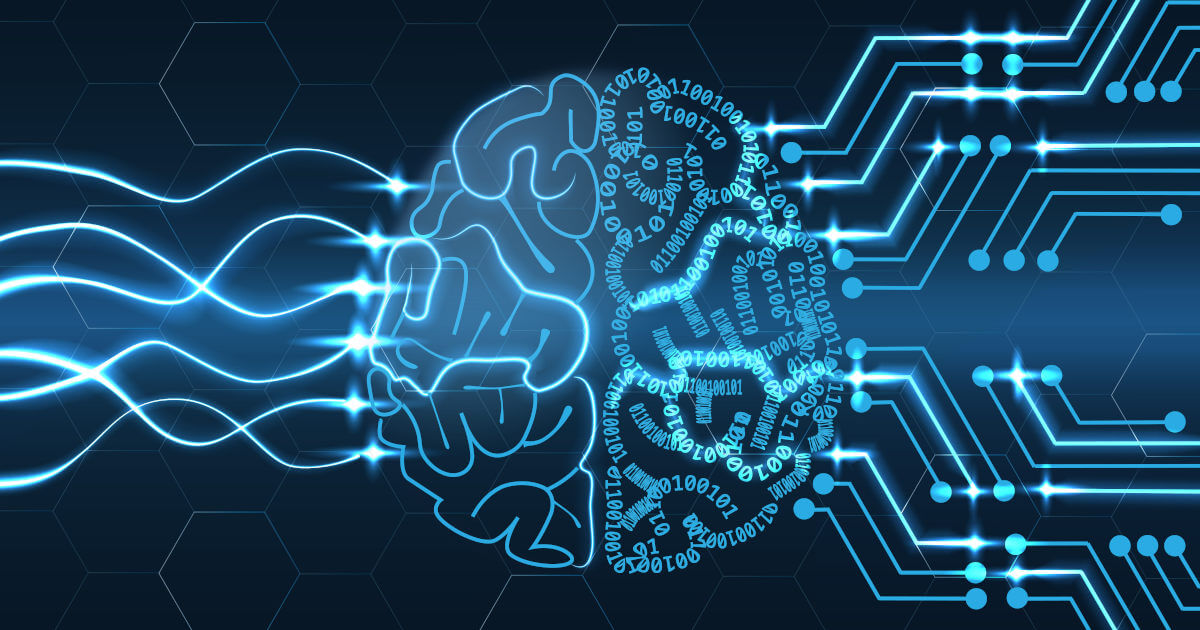



На курсе Deep Learning Весна 2021 меня привлекла работа с табличными данными для бизнес задач. Далее я сфокусировался на работу с фрейморком LightAutoML (LAMA). Модули библитеки LAMA, которая есть [в открытом доступе на github]( https://github.com/sberbank-ai-lab/LightAutoML/ ).  Полезная ссылка для работы с LightAutoML.

In [ ]:
!pip install -U lightautoml #установка LAMA

In [ ]:
import os
import time
import re

import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

#библиотеки LAMA, которые есть в открытом доступе на github
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.dataset.roles import NumericRole

# Параметры LightAutoML

In [ ]:
N_THREADS = 4 #количество виртуальных ЦП для создания модели LightAutoML
N_FOLDS = 5 #количество складок во внутреннем CV 
RANDOM_STATE = 42 #случайное состояние
TEST_SIZE = 0.2 #деление на train и тест выборку
TIMEOUT = 10 * 3600 #секунды работы одного AutoML, в данном датасете быстрее происходит работа (здесь в районе 3 ч)
TARGET_NAME = 'target'

# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!unzip '/content/gdrive/MyDrive/DL_LAMA_Kaggle/tabular-playground-series-jun-2021.zip'

Archive:  /content/gdrive/MyDrive/DL_LAMA_Kaggle/tabular-playground-series-jun-2021.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train_data = pd.read_csv('/content/train.csv')
train_data[TARGET_NAME] = train_data[TARGET_NAME].str.slice(start=6).astype(int) - 1
test_data = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

## Первая модель обучения TabularAutoML

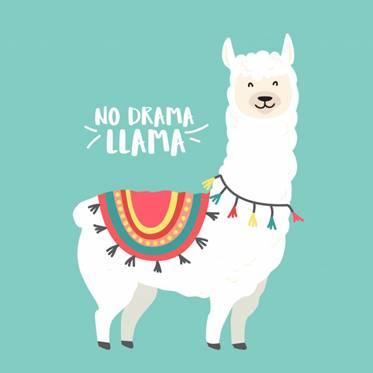

In [ ]:
task = Task('multiclass',) #multi-class logarithmic loss (по условию соревнования)

roles = {
    'target': TARGET_NAME, 
    'drop': ['id'], #удаляем колонку 'id'
}

Параметры работы [LightAutoML с табличными данными](https://github.com/sberbank-ai-lab/LightAutoML/tree/master/lightautoml/automl/presets) github

In [ ]:
%%time 

automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       general_params = { #параметры работы с табличными данными 
                           'use_algos': [['linear_l2', 'lgb_tuned', 'cb_tuned']],
                           'return_all_predictions': True,  #просьба LAMА-е вернуть все predict-ы с уровня до блендера
                           'weighted_blender_max_nonzero_coef': 0.0
                       }, #задействуем один уровень и модели: 'linear_l2' - линейная регрессия, 
                       #'lgb_tuned' - LGBM с перебором параметров optuna, 
                       #'cb_tuned' - catboost с перебором параметров optuna
                       tuning_params = {'max_tuning_time': 2000},
                       reader_params = {'n_jobs': N_THREADS},
                       config_path = '/content/gdrive/MyDrive/DL_LAMA_Kaggle/lightautoml-configs/conf_0_sel_type_0.yml'
                       )
oof_pred = automl.fit_predict(train_data, roles = roles)
print('oof_pred:\n{}\nShape = {}'.format(oof_pred[:10], oof_pred.shape))

Start automl preset with listed constraints:
- time: 36000 seconds
- cpus: 4 cores
- memory: 16 gb

Train data shape: (200000, 77)
Feats was rejected during automatic roles guess: []


Layer 1 ...
Train process start. Time left 35942.872185230255 secs
Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...

===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = -1.8450601804748177
Linear model: C = 5e-05 score = -1.8283252469621598
Linear model: C = 0.0001 score = -1.825634957921505
Linear model: C = 0.0005 score = -1.8244530062444508
Linear model: C = 0.001 score = -1.8245736708514393
Linear model: C = 0.005 score = -1.82473858108297

===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = -1.8415574234500527
Linear model: C = 5e-05 score = -1.8226242433339357
Linear model: C = 0.0001 score = -1.819289694841951
Linear model: C = 0.0005 score = -1.8173265294324608
Linear model: C = 0.001 score = -1.817

Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid's multi_logloss: 1.76099
[200]	valid's multi_logloss: 1.75841
Early stopping, best iteration is:
[168]	valid's multi_logloss: 1.75769
Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid's multi_logloss: 1.75817
[200]	valid's multi_logloss: 1.75439
Early stopping, best iteration is:
[172]	valid's multi_logloss: 1.75406
Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid's multi_logloss: 1.76065
[200]	val

In [ ]:
test_pred = automl.predict(test_data)
print('Prediction for test data:\n{}\nShape = {}'.format(test_pred[:10], test_pred.shape))

Prediction for test data:
array([[0.04032373, 0.21020448, 0.10030125, 0.02154386, 0.0120142 ,
        0.27153382, 0.04978257, 0.17374352, 0.1205526 , 0.0539349 ,
        0.38567728, 0.17059542, 0.02306439, 0.01447292, 0.16133553,
        0.02468969, 0.05257523, 0.11365465, 0.05412539, 0.35379165,
        0.14973931, 0.02700206, 0.01251281, 0.17920385, 0.02803543,
        0.06854689, 0.12704262],
       [0.04831935, 0.1647382 , 0.09455426, 0.0246047 , 0.01508246,
        0.21580401, 0.06812467, 0.22032952, 0.14844286, 0.03897237,
        0.09887565, 0.07246157, 0.01743269, 0.01471703, 0.25533962,
        0.07313459, 0.31546608, 0.11360043, 0.04274221, 0.07384145,
        0.05629124, 0.01844389, 0.01288822, 0.26286536, 0.08581824,
        0.31256726, 0.1345421 ],
       [0.04080092, 0.09406334, 0.06191137, 0.02036663, 0.01275765,
        0.38578495, 0.05836988, 0.21268812, 0.11325713, 0.02174406,
        0.03263529, 0.02212304, 0.01144029, 0.00574426, 0.7033652 ,
        0.02931079, 0.11

На вход обучения второй модели делаем ещё три признака первого LightAutoML + NN

In [ ]:
columns = ['PREDS_Linear_' + str(i) for i in range(1, 10)] + \
          ['PREDS_LGBM_' + str(i) for i in range(1, 10)] + \
          ['PREDS_CB_' + str(i) for i in range(1, 10)] + \
          ['PREDS_NN_' + str(i) for i in range(1, 10)]


Признак ранее обученной нейронной сети

In [ ]:
oof_nn = pd.read_csv('/content/gdrive/MyDrive/DL_LAMA_Kaggle/OOF_nn_predict.csv')
test_nn = pd.read_csv('/content/gdrive/MyDrive/DL_LAMA_Kaggle/nn_predict .csv')

In [ ]:
test_nn

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.059315,0.399199,0.163908,0.027262,0.014184,0.148743,0.021738,0.046169,0.119483
1,200001,0.043541,0.070072,0.052741,0.019208,0.013297,0.277576,0.086482,0.314758,0.122326
2,200002,0.016992,0.023859,0.018280,0.009929,0.005921,0.747405,0.024644,0.109537,0.043434
3,200003,0.051002,0.126280,0.089748,0.034470,0.019748,0.214898,0.076077,0.224876,0.162902
4,200004,0.044904,0.113380,0.083342,0.026283,0.014556,0.279488,0.068959,0.221467,0.147622
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.074625,0.371720,0.144363,0.031139,0.016392,0.098845,0.038024,0.082067,0.142825
99996,299996,0.050361,0.250658,0.139812,0.026081,0.016920,0.152085,0.050519,0.151914,0.161650
99997,299997,0.066519,0.253991,0.124981,0.030030,0.014458,0.182111,0.047037,0.131950,0.148922
99998,299998,0.035058,0.023390,0.020058,0.012376,0.011942,0.354054,0.069060,0.385467,0.088594


Объединяем полученные фичи с данными

In [ ]:
OOF_preds = pd.DataFrame(np.hstack((oof_pred.data, oof_nn.drop('id', axis = 1))), columns = columns)
TEST_preds = pd.DataFrame(np.hstack((test_pred.data, test_nn.drop('id', axis = 1))), columns = columns)

In [ ]:
for col in columns:
    train_data[col] = OOF_preds[col]
    test_data[col] = TEST_preds[col]

# Второе обучение LightAutoML

На вход обучения второй модели отдаём исходные данные, предикты из первого LightAutoML + Neural Network "DL_NN.ipynb" (предсказания ранее обученной NN для train и test)

In [ ]:
roles = {
    'target': TARGET_NAME,
    'drop': ['id'],
    NumericRole(np.float32, prob = True): columns #обозначаем ранее полученные предикты как вероятности
}

automl = TabularUtilizedAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       general_params = {
                           'use_algos': [['lgb_tuned', 'lgb', 'cb_tuned']],
                       },
                       tuning_params = {'max_tuning_time': 2200},
                       reader_params = {'n_jobs': N_THREADS},
                       configs_list = ['/content/gdrive/MyDrive/DL_LAMA_Kaggle/lightautoml-configs/conf_1_sel_type_1.yml'],
                       max_runs_per_config=1
                       )
oof_pred = automl.fit_predict(train_data, roles = roles)
print('oof_pred:\n{}\nShape = {}'.format(oof_pred[:10], oof_pred.shape))

Current random state: {'reader_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}
Found reader_params in kwargs, need to combine
Merged variant for reader_params = {'n_jobs': 4, 'random_state': 42}
Found general_params in kwargs, need to combine
Merged variant for general_params = {'use_algos': [['lgb_tuned', 'lgb', 'cb_tuned']], 'return_all_predictions': False}
Start automl preset with listed constraints:
- time: 35999.99221968651 seconds
- cpus: 4 cores
- memory: 16 gb

Train data shape: (200000, 113)
Feats was rejected during automatic roles guess: []


Layer 1 ...
Train process start. Time left 35907.20546126366 secs
Start fitting Selector_LightGBM ...

===== Start working with fold 0 for Selector_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid's multi_logloss: 1.75071
[200]	valid's multi_logloss: 1.7512
Early stopping, best iteration is:
[142]	valid's multi_logloss: 1.75013
Selector_LightGBM fitting and pre

# Важность признаков

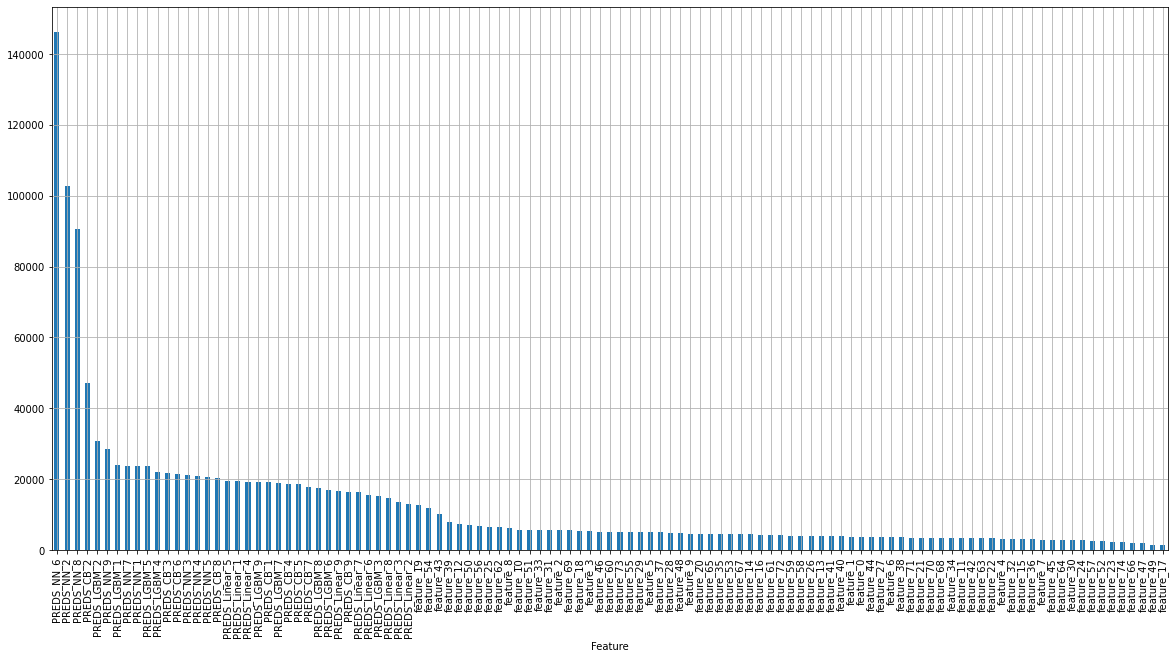

In [ ]:
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

## Прогноз

In [ ]:
test_pred = automl.predict(test_data)
print('Prediction for test data:\n{}\nShape = {}'.format(test_pred[:10], test_pred.shape))

print('Check scores...')
print('OOF score: {}'.format(log_loss(train_data[TARGET_NAME].values, oof_pred.data)))

Prediction for test data:
array([[0.05905269, 0.42289257, 0.15328236, 0.02470868, 0.01170752,
        0.14636007, 0.0204338 , 0.04724199, 0.11432038],
       [0.04173147, 0.07022387, 0.05500784, 0.01902866, 0.01480492,
        0.28339458, 0.08419622, 0.30582651, 0.12578598],
       [0.01929016, 0.02670688, 0.01503655, 0.0096728 , 0.00585996,
        0.7436366 , 0.02495496, 0.11174849, 0.04309366],
       [0.04859898, 0.11505026, 0.08387449, 0.0329707 , 0.0172743 ,
        0.23912698, 0.08372327, 0.21735574, 0.16202533],
       [0.04193237, 0.11413227, 0.08302279, 0.02611687, 0.01516647,
        0.28938252, 0.06656851, 0.21527599, 0.14840224],
       [0.04714027, 0.19349284, 0.10499704, 0.02649359, 0.01318163,
        0.2904572 , 0.04650985, 0.13523573, 0.14249189],
       [0.04312338, 0.10644579, 0.08140579, 0.03057131, 0.01898128,
        0.22173035, 0.08968828, 0.24662495, 0.16142893],
       [0.04152093, 0.45400843, 0.19578387, 0.02183283, 0.01404145,
        0.03170899, 0.03515671,

In [ ]:
submission.iloc[:, 1:] = test_pred.data
submission.to_csv('lightautoml_nn.csv', index = False)

# Score LightAutoML стал лучше с 1.74562(NN) до 1.74531 (24.06.2021 163 место из 968) в июньском соревновании Kaggle

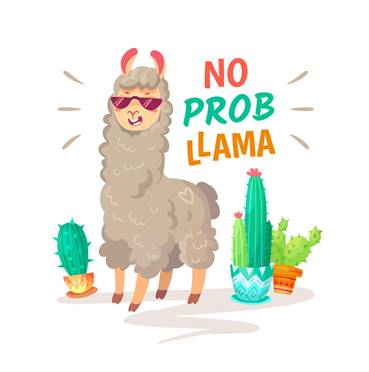


## Низкий Вам поклон за курсы Deep_lerning и LightAutoML! 